**Я импортирую библиотеки для создания линейной регрессии**

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Здесь я читаю Базу Данных и удаляю из неё строки с пустыми значениями**

In [15]:
df = pd.read_csv("garments_worker_productivity.csv")
df.dropna(inplace=True)

**Выбираем данные по которым будет строить линейную регрессию**

In [16]:
features = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time',
            'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
target = 'actual_productivity'

**Здесь я разделяю данные на тестовые и на обучающие**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

**Создаём модель линейной регресии**

In [18]:
model = LinearRegression()

**Обучаем модель**

In [19]:
model.fit(X_train, Y_train)

LinearRegression()

**Делаем предсказание на тестовых данных**

In [20]:
predictions = model.predict(X_test)

**Смотрим на MAE, MSE, R^2 по данной модели**

In [21]:
#   Оценка качества модели
mae = mean_absolute_error(Y_test, predictions)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(Y_test, predictions)
print("Mean Squared Error:", mse)
r2 = r2_score(Y_test, predictions)
print("R^2 Score:", r2)


Mean Absolute Error: 0.04094384794241361
Mean Squared Error: 0.003991240512443999
R^2 Score: 0.8311116425382702


Ниже смотрим коэфиценты полученного уравнения

In [22]:
print(model.intercept_)
print(model.coef_)

0.17206300410234476
[-2.74545379e-03  6.30133475e-01 -3.07583359e-03 -3.49775761e-09
 -3.47270526e-06  3.01864164e-03  5.11667839e-04 -5.32235214e-03
  2.97652030e-05  1.45936686e-03]


**По данным коэфицентам можем сделать вывод, что ключевой фактор в actual_productivity является столбец targeted_productivity**

**Получили вот такое уравнение:**

0.17206300410234476 - 0.0027454538 * team + 0.6301334747 * targeted_productivity - 0.0030758336 * smv - 0.0000000035 * wip - 0.0000034727 * over_time + 0.0030186416 * incentive + 0.0005116678 * idle_time - 0.0053223521 * idle_men + 0.0000297652 * no_of_style_change + 0.0014593669 * actual_productivity

**По всем данным выше я могу сделать вывод что наша модель не плохо предсказывает, но ей всё ещё есть куда стремится ;)**

**Ниже показана матрица корреляции в виде heatmap, boxplot для исследования выбросов**

<ipython-input-24-a1f476d702a1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


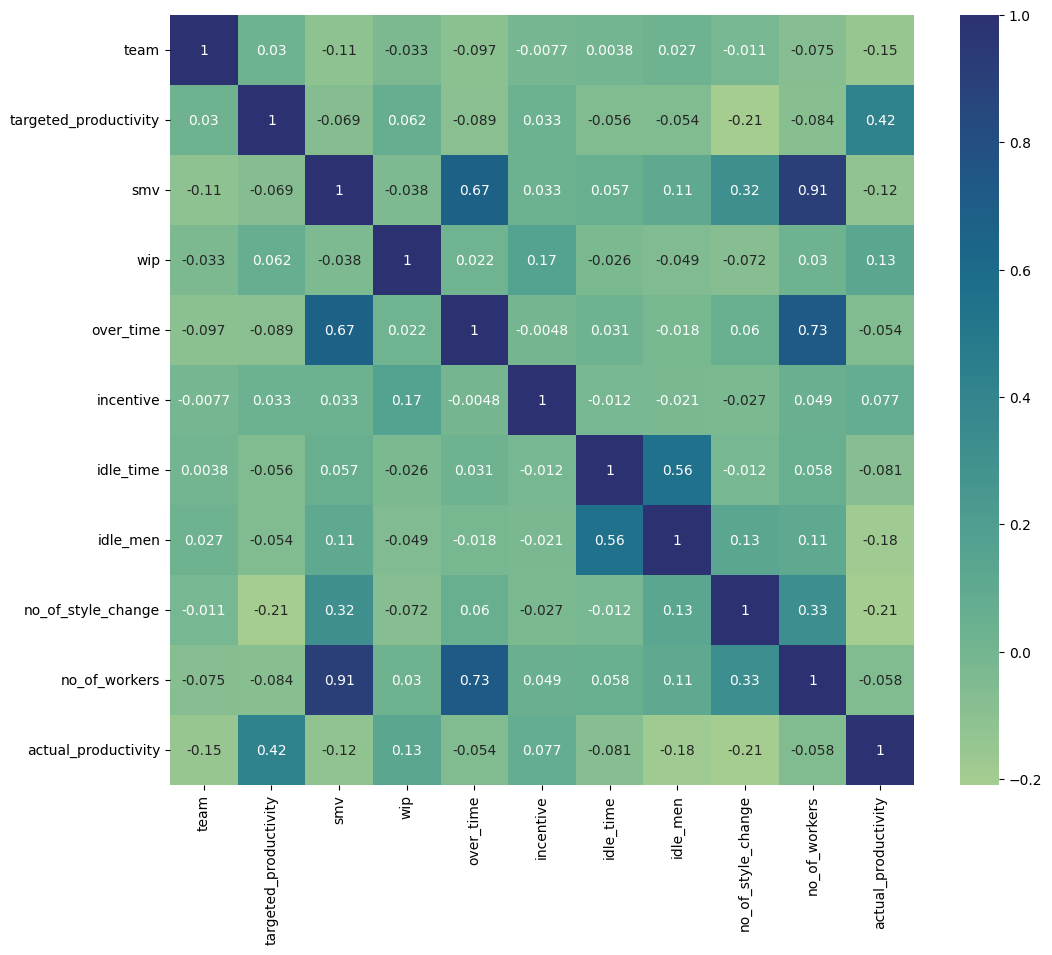

In [24]:
data = pd.read_csv("garments_worker_productivity.csv")

corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="crest")
plt.show()

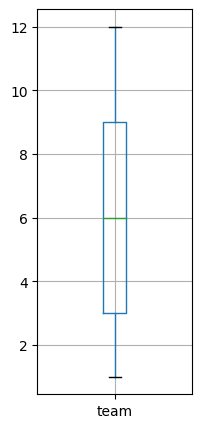

In [29]:
data.boxplot(column=['team'], figsize=(2, 5))
plt.show()

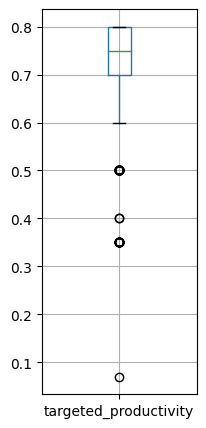

In [30]:
data.boxplot(column=['targeted_productivity'], figsize=(2, 5))
plt.show()

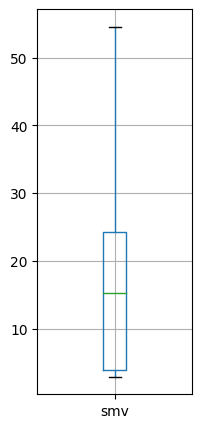

In [31]:
data.boxplot(column=['smv'], figsize=(2, 5))
plt.show()

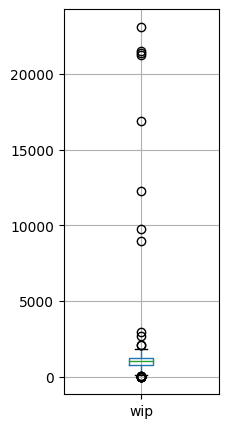

In [32]:
data.boxplot(column=['wip'], figsize=(2, 5))
plt.show()

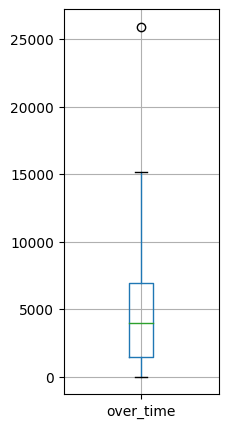

In [33]:
data.boxplot(column=['over_time'], figsize=(2, 5))
plt.show()

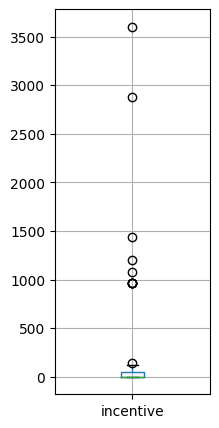

In [34]:
data.boxplot(column=['incentive'], figsize=(2, 5))
plt.show()

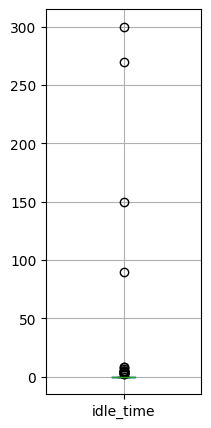

In [35]:
data.boxplot(column=['idle_time'], figsize=(2, 5))
plt.show()

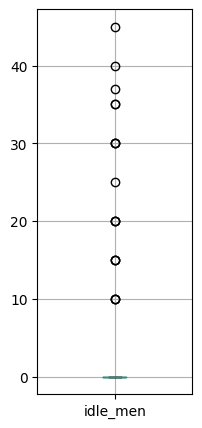

In [36]:
data.boxplot(column=['idle_men'], figsize=(2, 5))
plt.show()

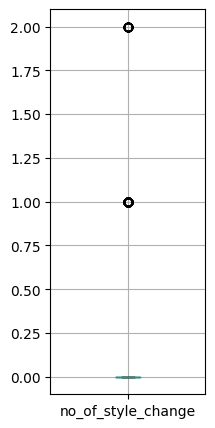

In [40]:
data.boxplot(column=['no_of_style_change'], figsize=(2, 5))
plt.show()

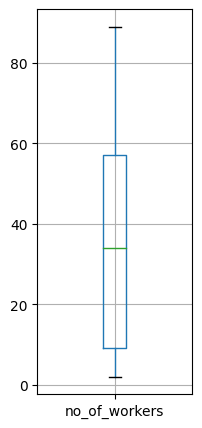

In [38]:
data.boxplot(column=['no_of_workers'], figsize=(2, 5))
plt.show()